Ufuk Altun

using Pkg; pkg"add CUDA Knet IterTools FileIO JLD2 Images Plots PyCall"

In [1]:
using PyCall
@pyimport torch

In [2]:
include("models.jl");
include("training.jl");

#### Generate an alexnet model

In [13]:
model = generate_alexnet_model( 7 ; pretrained = true);

#### Set optimizers of each parameter to Adam. Parameter sizes should be:
##### Original Alexnet
- (11, 11, 3, 64)
- (1, 1, 64, 1)
- (5, 5, 64, 192)
- (1, 1, 192, 1)
- (3, 3, 192, 384)
- (1, 1, 384, 1)
- (3, 3, 384, 256)
- (1, 1, 256, 1)
- (3, 3, 256, 256)
- (1, 1, 256, 1)
- (4096, 9216)
- (4096,)
- (4096, 4096)
- (4096,)
- (7, 4096)
- (7,)

In [4]:
for param in params(model)
    param.opt = Adam(; lr=1e-5)
    println(size(param))
end

(11, 11, 3, 64)
(1, 1, 64, 1)
(5, 5, 64, 192)
(1, 1, 192, 1)
(3, 3, 192, 384)
(1, 1, 384, 1)
(3, 3, 384, 256)
(1, 1, 256, 1)
(3, 3, 256, 256)
(1, 1, 256, 1)
(4096, 9216)
(4096,)
(4096, 4096)
(4096,)
(7, 4096)
(7,)


#### Define batchsize, model path and target domain  

In [5]:
num_iter=1000
check_freq=20
batchsize = 128
atype = Array{Float32}
data_path = "/Users/ufukaltun/Documents/koç/dersler/ku deep learning/project";

#### Preprocess data, generate minibatches for each modain and generate a baseline minibach which contains three known domains

In [6]:
loss, acc = train("b", "PACS", "photo", model; num_iter=num_iter, 
                                                 check_freq=check_freq, 
                                                 batchsize=batchsize, 
                                                 data_path=data_path, 
                                                 atype=atype);

Datasets are loaded


[1, 00:00, 3.36i/s] 

First batch is trained successfully


[20, 12:37, 38.63s/i] 

Train loss: 1.7693803  Val loss: 1.7726035  Train acc: 0.30694444444444446  Val acc: 0.2877604166666667


[40, 31:23, 36.01s/i]  

Train loss: 1.4692999  Val loss: 1.4858196  Train acc: 0.45590277777777777  Val acc: 0.4479166666666667


[60, 49:55, 36.05s/i]  

Train loss: 1.2617698  Val loss: 1.3003395  Train acc: 0.5477430555555556  Val acc: 0.515625


[80, 01:08:26, 37.23s/i] 

Train loss: 1.100818  Val loss: 1.1534643  Train acc: 0.6015625  Val acc: 0.58203125


[100, 01:26:52, 36.01s/i] 

Train loss: 0.9659938  Val loss: 1.032042  Train acc: 0.6512152777777778  Val acc: 0.6236979166666666


[120, 01:45:25, 36.93s/i]  

Train loss: 0.85270876  Val loss: 0.9388882  Train acc: 0.6934027777777778  Val acc: 0.6653645833333334


[140, 02:03:59, 37.49s/i]  

Train loss: 0.7552204  Val loss: 0.8573478  Train acc: 0.7305555555555555  Val acc: 0.7018229166666666


[160, 02:22:25, 36.25s/i]  

Train loss: 0.6771482  Val loss: 0.79719555  Train acc: 0.7628472222222222  Val acc: 0.7161458333333334


[180, 02:41:09, 37.15s/i]  

Train loss: 0.61321825  Val loss: 0.7652385  Train acc: 0.7838541666666666  Val acc: 0.734375


[200, 02:59:46, 36.09s/i]  

Train loss: 0.56198937  Val loss: 0.7309541  Train acc: 0.8003472222222222  Val acc: 0.73828125


[220, 03:18:30, 37.98s/i]  

Train loss: 0.51624054  Val loss: 0.7078626  Train acc: 0.8196180555555556  Val acc: 0.75


[240, 03:36:59, 36.51s/i]  

Train loss: 0.46591988  Val loss: 0.6660583  Train acc: 0.8368055555555556  Val acc: 0.7604166666666666


[260, 03:55:41, 35.60s/i]  

Train loss: 0.43026748  Val loss: 0.64623845  Train acc: 0.8508680555555556  Val acc: 0.765625


[280, 04:14:22, 36.11s/i]  

Train loss: 0.39117306  Val loss: 0.620133  Train acc: 0.86875  Val acc: 0.7682291666666666


[300, 04:32:56, 36.85s/i]  

Train loss: 0.36097935  Val loss: 0.6093371  Train acc: 0.8772569444444445  Val acc: 0.7734375


[320, 04:51:34, 36.28s/i]  

Train loss: 0.33249077  Val loss: 0.5872967  Train acc: 0.8911458333333333  Val acc: 0.7734375


[340, 05:10:02, 35.58s/i]  

Train loss: 0.30710304  Val loss: 0.59066695  Train acc: 0.8986111111111111  Val acc: 0.7825520833333334


[360, 05:28:28, 36.11s/i]  

Train loss: 0.2857373  Val loss: 0.579203  Train acc: 0.9055555555555556  Val acc: 0.7825520833333334


[380, 05:46:40, 40.98s/i]  

Train loss: 0.26337293  Val loss: 0.56644773  Train acc: 0.915625  Val acc: 0.8020833333333334


[400, 06:05:23, 36.36s/i]  

Train loss: 0.24012999  Val loss: 0.5538404  Train acc: 0.9258680555555555  Val acc: 0.8033854166666666


[420, 06:24:05, 35.90s/i]  

Train loss: 0.2225433  Val loss: 0.5501272  Train acc: 0.9293402777777777  Val acc: 0.8072916666666666


[440, 06:42:33, 36.28s/i]  

Train loss: 0.20417716  Val loss: 0.5394837  Train acc: 0.9345486111111111  Val acc: 0.80078125


[460, 07:00:55, 36.38s/i]  

Train loss: 0.18476886  Val loss: 0.5202576  Train acc: 0.9465277777777777  Val acc: 0.8046875


[480, 07:19:34, 37.29s/i]  

Train loss: 0.16854607  Val loss: 0.5550811  Train acc: 0.9508680555555555  Val acc: 0.8111979166666666


[500, 07:38:23, 35.81s/i]  

Train loss: 0.15340315  Val loss: 0.52074146  Train acc: 0.9579861111111111  Val acc: 0.8138020833333334


[520, 07:56:53, 36.31s/i]  

Train loss: 0.14244443  Val loss: 0.51104695  Train acc: 0.9598958333333333  Val acc: 0.8138020833333334


[540, 08:15:26, 36.50s/i]  

Train loss: 0.13190214  Val loss: 0.5324927  Train acc: 0.9654513888888889  Val acc: 0.8111979166666666


[560, 08:34:00, 37.05s/i]  

Train loss: 0.11878823  Val loss: 0.5168364  Train acc: 0.9701388888888889  Val acc: 0.8151041666666666


[580, 08:52:55, 37.15s/i]  

Train loss: 0.10827076  Val loss: 0.501763  Train acc: 0.9743055555555555  Val acc: 0.8125


[600, 09:11:39, 38.22s/i]  

Train loss: 0.099813916  Val loss: 0.50971454  Train acc: 0.9755208333333333  Val acc: 0.82421875


[620, 09:30:16, 36.99s/i]  

Train loss: 0.09807769  Val loss: 0.50881755  Train acc: 0.9755208333333333  Val acc: 0.8294270833333334


[640, 09:48:51, 35.96s/i]  

Train loss: 0.092437215  Val loss: 0.5285538  Train acc: 0.9765625  Val acc: 0.8229166666666666


[660, 10:07:11, 36.27s/i]  

Train loss: 0.076045424  Val loss: 0.51205146  Train acc: 0.9835069444444444  Val acc: 0.8346354166666666


[680, 10:26:05, 36.56s/i]  

Train loss: 0.071642004  Val loss: 0.502106  Train acc: 0.9862847222222222  Val acc: 0.8307291666666666


[700, 10:44:26, 38.91s/i]  

Train loss: 0.064566106  Val loss: 0.49230686  Train acc: 0.9888888888888889  Val acc: 0.828125


[720, 11:03:02, 39.63s/i]  

Train loss: 0.060651172  Val loss: 0.51231784  Train acc: 0.9892361111111111  Val acc: 0.8268229166666666


[740, 11:21:49, 36.34s/i]  

Train loss: 0.05364814  Val loss: 0.5161682  Train acc: 0.9918402777777777  Val acc: 0.8385416666666666


[760, 11:40:48, 44.18s/i]  

Train loss: 0.051825356  Val loss: 0.53242886  Train acc: 0.9904513888888888  Val acc: 0.8268229166666666


[780, 11:59:06, 36.35s/i]  

Train loss: 0.045146428  Val loss: 0.5094925  Train acc: 0.9944444444444445  Val acc: 0.84765625


[800, 12:17:40, 36.86s/i]  

Train loss: 0.041551113  Val loss: 0.5262027  Train acc: 0.9951388888888889  Val acc: 0.8385416666666666


[820, 12:36:25, 36.44s/i]  

Train loss: 0.03934339  Val loss: 0.5153776  Train acc: 0.9963541666666667  Val acc: 0.828125


[840, 12:55:07, 36.23s/i]  

Train loss: 0.034007743  Val loss: 0.48454672  Train acc: 0.996875  Val acc: 0.8424479166666666


[860, 13:13:40, 35.47s/i]  

Train loss: 0.031852014  Val loss: 0.49876025  Train acc: 0.9970486111111111  Val acc: 0.8450520833333334


[880, 13:32:06, 35.44s/i]  

Train loss: 0.02926367  Val loss: 0.51580393  Train acc: 0.9967013888888889  Val acc: 0.8385416666666666


[900, 13:50:26, 36.60s/i]  

Train loss: 0.027662091  Val loss: 0.50412726  Train acc: 0.9972222222222222  Val acc: 0.8346354166666666


[920, 14:09:07, 35.87s/i]  

Train loss: 0.024855038  Val loss: 0.52192414  Train acc: 0.9980902777777778  Val acc: 0.84765625


[940, 14:27:36, 35.69s/i]  

Train loss: 0.02274852  Val loss: 0.5203736  Train acc: 0.9987847222222223  Val acc: 0.8424479166666666


[960, 14:46:09, 39.80s/i]  

Train loss: 0.021129232  Val loss: 0.5132348  Train acc: 0.9987847222222223  Val acc: 0.8450520833333334


[980, 15:04:51, 35.98s/i]  

Train loss: 0.019637186  Val loss: 0.49189633  Train acc: 0.9989583333333333  Val acc: 0.8450520833333334


[1000, 15:23:24, 37.22s/i] 

Train loss: 0.018936904  Val loss: 0.51046  Train acc: 0.9993055555555556  Val acc: 0.8541666666666666
Training ended successfully, saving the results
Test loss: 1.5125751  Test acc: 0.65234375


In [7]:
model = generate_alexnet_model(; pretrained = true);
for param in params(model)
    param.opt = Adam(; lr=1e-5)
    println(size(param))
end


(11, 11, 3, 64)
(1, 1, 64, 1)
(5, 5, 64, 192)
(1, 1, 192, 1)
(3, 3, 192, 384)
(1, 1, 384, 1)
(3, 3, 384, 256)
(1, 1, 256, 1)
(3, 3, 256, 256)
(1, 1, 256, 1)
(4096, 9216)
(4096,)
(4096, 4096)
(4096,)
(7, 4096)
(7,)


In [8]:
loss, acc = train("gs", "PACS", "photo", model; num_iter=num_iter, 
                                                  check_freq=check_freq, 
                                                  batchsize=batchsize, 
                                                  data_path=data_path, 
                                                  atype=atype);

Datasets are loaded


[1, 00:01, 1.94i/s] 

First batch is trained successfully


[20, 14:45, 45.14s/i] 

Train loss: 2.031459  Val loss: 2.0373447  Train acc: 0.22378472222222223  Val acc: 0.21614583333333334


[40, 36:30, 44.36s/i]  

Train loss: 1.7415799  Val loss: 1.7448311  Train acc: 0.32222222222222224  Val acc: 0.3216145833333333


[60, 58:14, 46.90s/i]  

Train loss: 1.5744001  Val loss: 1.5738167  Train acc: 0.396875  Val acc: 0.3958333333333333


[80, 01:19:37, 43.32s/i]  

Train loss: 1.4468952  Val loss: 1.430152  Train acc: 0.4486111111111111  Val acc: 0.4583333333333333


[100, 01:41:26, 48.56s/i] 

Train loss: 1.3353683  Val loss: 1.3246176  Train acc: 0.49444444444444446  Val acc: 0.5013020833333334


[120, 02:02:45, 42.92s/i]  

Train loss: 1.2392563  Val loss: 1.2108686  Train acc: 0.5395833333333333  Val acc: 0.5520833333333334


[140, 02:24:44, 46.25s/i]  

Train loss: 1.1529175  Val loss: 1.1079891  Train acc: 0.5755208333333334  Val acc: 0.59765625


[160, 02:46:21, 46.82s/i]  

Train loss: 1.0819458  Val loss: 1.0284618  Train acc: 0.6027777777777777  Val acc: 0.62109375


[180, 03:07:50, 43.97s/i]  

Train loss: 1.0165516  Val loss: 0.9538046  Train acc: 0.6203125  Val acc: 0.6484375


[200, 03:29:34, 46.43s/i]  

Train loss: 0.97323525  Val loss: 0.8974693  Train acc: 0.6442708333333333  Val acc: 0.66796875


[220, 03:51:13, 44.86s/i]  

Train loss: 0.9332549  Val loss: 0.8664124  Train acc: 0.6633680555555556  Val acc: 0.67578125


[240, 04:12:42, 46.27s/i]  

Train loss: 0.897069  Val loss: 0.8289206  Train acc: 0.6751736111111111  Val acc: 0.7018229166666666


[260, 04:34:01, 47.36s/i]  

Train loss: 0.86965716  Val loss: 0.8003079  Train acc: 0.6866319444444444  Val acc: 0.7096354166666666


[280, 04:56:03, 46.67s/i]  

Train loss: 0.85022473  Val loss: 0.77011454  Train acc: 0.696875  Val acc: 0.7213541666666666


[300, 05:17:33, 43.08s/i]  

Train loss: 0.8346781  Val loss: 0.7564896  Train acc: 0.7050347222222222  Val acc: 0.7135416666666666


[320, 05:38:38, 43.26s/i]  

Train loss: 0.8230523  Val loss: 0.729748  Train acc: 0.7131944444444445  Val acc: 0.7356770833333334


[340, 06:00:18, 43.89s/i]  

Train loss: 0.81080335  Val loss: 0.72863495  Train acc: 0.7185763888888889  Val acc: 0.7395833333333334


[360, 06:22:02, 44.24s/i]  

Train loss: 0.8027732  Val loss: 0.6982343  Train acc: 0.721875  Val acc: 0.7565104166666666


[380, 06:43:25, 43.63s/i]  

Train loss: 0.79722524  Val loss: 0.69814384  Train acc: 0.7274305555555556  Val acc: 0.7526041666666666


[400, 07:05:27, 48.41s/i]  

Train loss: 0.7941777  Val loss: 0.7009713  Train acc: 0.7328125  Val acc: 0.7604166666666666


[420, 07:28:37, 49.62s/i]  

Train loss: 0.79477525  Val loss: 0.6930174  Train acc: 0.7378472222222222  Val acc: 0.7643229166666666


[440, 07:52:53, 47.75s/i]  

Train loss: 0.78542453  Val loss: 0.6802764  Train acc: 0.7380208333333333  Val acc: 0.7682291666666666


[460, 08:15:52, 47.58s/i]  

Train loss: 0.7905906  Val loss: 0.68547523  Train acc: 0.7430555555555556  Val acc: 0.7721354166666666


[480, 08:40:12, 48.70s/i]  

Train loss: 0.7871459  Val loss: 0.68218327  Train acc: 0.7444444444444445  Val acc: 0.7669270833333334


[500, 09:02:49, 55.59s/i]  

Train loss: 0.7984008  Val loss: 0.66029084  Train acc: 0.7439236111111112  Val acc: 0.7734375


[520, 09:25:54, 48.12s/i]  

Train loss: 0.79383856  Val loss: 0.6868979  Train acc: 0.7472222222222222  Val acc: 0.7682291666666666


[540, 09:50:12, 56.24s/i]  

Train loss: 0.7984399  Val loss: 0.693735  Train acc: 0.7520833333333333  Val acc: 0.7825520833333334


[560, 10:13:06, 45.91s/i]  

Train loss: 0.80336994  Val loss: 0.6678444  Train acc: 0.7520833333333333  Val acc: 0.77734375


[580, 10:37:08, 54.48s/i]  

Train loss: 0.81140685  Val loss: 0.6788236  Train acc: 0.7524305555555556  Val acc: 0.78125


[600, 10:59:43, 46.25s/i]  

Train loss: 0.7997152  Val loss: 0.6911441  Train acc: 0.7567708333333333  Val acc: 0.7760416666666666


[620, 11:21:58, 43.35s/i]  

Train loss: 0.80218965  Val loss: 0.68799937  Train acc: 0.75625  Val acc: 0.7747395833333334


[640, 11:44:09, 48.43s/i]  

Train loss: 0.81173486  Val loss: 0.69354725  Train acc: 0.7578125  Val acc: 0.7708333333333334


[660, 12:06:15, 48.38s/i]  

Train loss: 0.8087753  Val loss: 0.68271655  Train acc: 0.7598958333333333  Val acc: 0.7838541666666666


[680, 12:28:12, 45.64s/i]  

Train loss: 0.80216277  Val loss: 0.6865966  Train acc: 0.7642361111111111  Val acc: 0.78125


[700, 12:50:04, 43.90s/i]  

Train loss: 0.8119195  Val loss: 0.68121433  Train acc: 0.7651041666666667  Val acc: 0.7838541666666666


[720, 13:12:20, 49.74s/i]  

Train loss: 0.82360435  Val loss: 0.68923753  Train acc: 0.7623263888888889  Val acc: 0.7721354166666666


[740, 13:34:21, 47.42s/i]  

Train loss: 0.8294766  Val loss: 0.7038171  Train acc: 0.7657986111111111  Val acc: 0.7864583333333334


[760, 13:56:38, 50.70s/i]  

Train loss: 0.82219976  Val loss: 0.6853478  Train acc: 0.7668402777777777  Val acc: 0.7864583333333334


[780, 14:19:08, 48.13s/i]  

Train loss: 0.8277329  Val loss: 0.7136692  Train acc: 0.7685763888888889  Val acc: 0.7955729166666666


[800, 14:41:25, 48.68s/i]  

Train loss: 0.8359601  Val loss: 0.68515813  Train acc: 0.7696180555555555  Val acc: 0.7721354166666666


[820, 15:03:35, 47.16s/i]  

Train loss: 0.84174377  Val loss: 0.7148069  Train acc: 0.7697916666666667  Val acc: 0.7903645833333334


[840, 15:25:45, 50.56s/i]  

Train loss: 0.8356792  Val loss: 0.69278073  Train acc: 0.7722222222222223  Val acc: 0.7799479166666666


[860, 15:47:31, 46.32s/i]  

Train loss: 0.8543291  Val loss: 0.7073717  Train acc: 0.7713541666666667  Val acc: 0.7825520833333334


[880, 16:10:11, 46.13s/i]  

Train loss: 0.85249525  Val loss: 0.7121217  Train acc: 0.7756944444444445  Val acc: 0.7825520833333334


[900, 16:32:23, 48.60s/i]  

Train loss: 0.85204226  Val loss: 0.74911743  Train acc: 0.7760416666666666  Val acc: 0.7877604166666666


[920, 16:54:58, 50.90s/i]  

Train loss: 0.8583385  Val loss: 0.70964414  Train acc: 0.7763888888888889  Val acc: 0.7838541666666666


[940, 17:17:06, 45.48s/i]  

Train loss: 0.84752053  Val loss: 0.70517075  Train acc: 0.7767361111111111  Val acc: 0.7890625


[960, 17:39:09, 47.06s/i]  

Train loss: 0.8700703  Val loss: 0.73871934  Train acc: 0.7755208333333333  Val acc: 0.7903645833333334


[980, 18:01:20, 47.06s/i]  

Train loss: 0.8640619  Val loss: 0.7212856  Train acc: 0.7769097222222222  Val acc: 0.7903645833333334


[1000, 18:23:32, 45.41s/i] 

Train loss: 0.86706257  Val loss: 0.7168604  Train acc: 0.7748263888888889  Val acc: 0.8059895833333334
Training ended successfully, saving the results
Test loss: 2.133886  Test acc: 0.5625


In [4]:
using Plots

In [9]:
best_model_b = load("/Users/ufukaltun/Documents/koç/dersler/ku deep learning/project_final/results_b_target_photo.jld2")["results"];

In [10]:
best_model_b = reshape(collect(Float32,flatten(best_model_b)),(4,:));

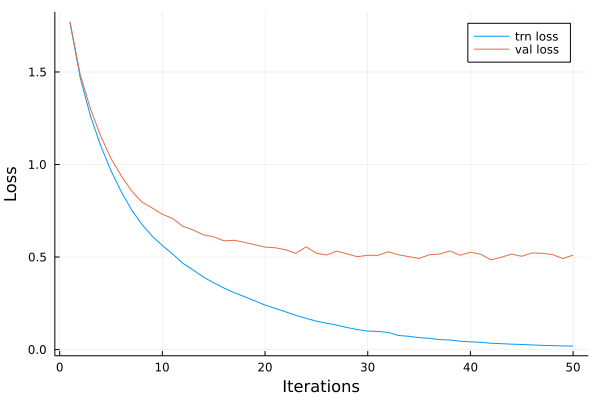

In [11]:
plot([best_model_b[1,:], best_model_b[2,:]],
    labels=["trn loss" "val loss" ],xlabel="Iterations",ylabel="Loss")

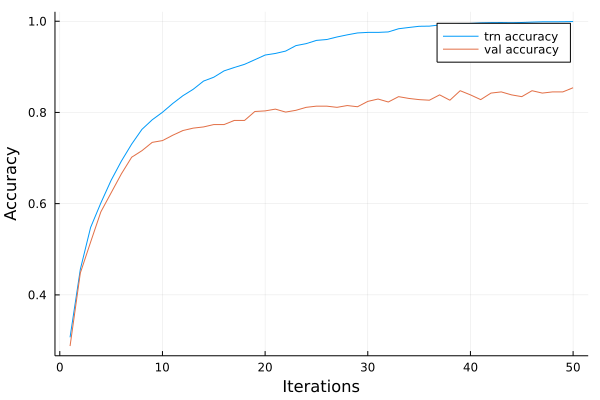

In [12]:
plot([best_model_b[3,:], best_model_b[4,:]],
    labels=["trn accuracy" "val accuracy" ],xlabel="Iterations",ylabel="Accuracy")

In [13]:
best_model_gs = load("/Users/ufukaltun/Documents/koç/dersler/ku deep learning/project_final/results_gs_target_photo.jld2")["results"];

In [14]:
best_model_gs = reshape(collect(Float32,flatten(best_model_gs)),(4,:));

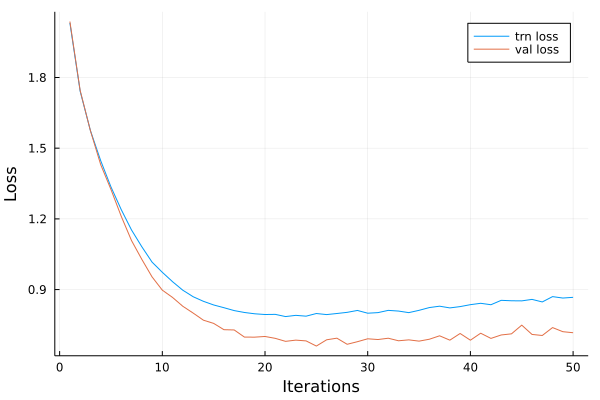

In [15]:
plot([best_model_gs[1,:], best_model_gs[2,:]],
    labels=["trn loss" "val loss" ],xlabel="Iterations",ylabel="Loss")

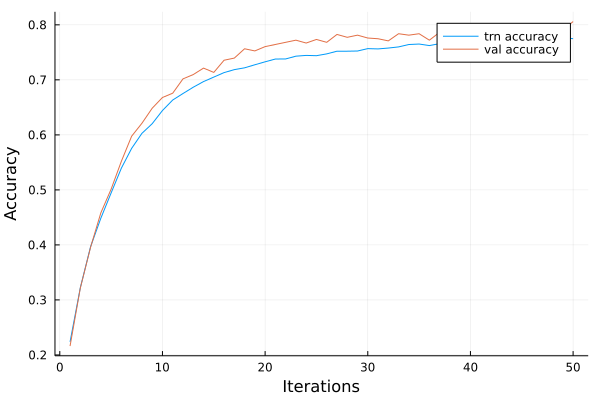

In [16]:
plot([best_model_gs[3,:], best_model_gs[4,:]],
    labels=["trn accuracy" "val accuracy" ],xlabel="Iterations",ylabel="Accuracy")

In [3]:
include("models.jl");
include("training.jl");
include("preprocess.jl");

In [4]:
model = generate_alexnet_model( 5 ; pretrained = true);

In [5]:
for param in params(model)
    param.opt = Adam(; lr=1e-5)
    println(size(param))
end

(11, 11, 3, 64)
(1, 1, 64, 1)
(5, 5, 64, 192)
(1, 1, 192, 1)
(3, 3, 192, 384)
(1, 1, 384, 1)
(3, 3, 384, 256)
(1, 1, 256, 1)
(3, 3, 256, 256)
(1, 1, 256, 1)
(4096, 9216)
(4096,)
(4096, 4096)
(4096,)
(5, 4096)
(5,)


In [8]:
num_iter=500
check_freq=20
batchsize = 128
atype = Array{Float32}
data_path = "/Users/ufukaltun/Documents/koç/dersler/ku deep learning/project_final";

In [9]:
loss, acc = train("gs", "VLCS", "Caltech101", model; num_iter=num_iter, 
                                                     check_freq=check_freq, 
                                                     batchsize=batchsize, 
                                                     data_path=data_path, 
                                                     atype=atype);

Datasets are loaded


[1, 00:01, 1.28i/s] 

First batch is trained successfully


[20, 16:02, 47.85s/i] 

Train loss: 1.2925138  Val loss: 1.2244875  Train acc: 0.4578450520833333  Val acc: 0.4817708333333333


[40, 39:13, 50.03s/i]  

Train loss: 1.1738372  Val loss: 1.1038848  Train acc: 0.5037434895833334  Val acc: 0.5611979166666666


[60, 01:02:40, 51.68s/i] 

Train loss: 1.1010834  Val loss: 1.0475267  Train acc: 0.5330403645833334  Val acc: 0.5755208333333334


[80, 01:25:56, 47.03s/i]  

Train loss: 1.0621305  Val loss: 0.9729614  Train acc: 0.5447591145833334  Val acc: 0.6015625


[100, 01:49:16, 53.54s/i] 

Train loss: 1.022398  Val loss: 0.97898716  Train acc: 0.5709635416666666  Val acc: 0.6197916666666666


[120, 02:13:02, 50.52s/i]  

Train loss: 0.99339175  Val loss: 0.9174049  Train acc: 0.5849609375  Val acc: 0.6315104166666666


[140, 02:37:12, 47.03s/i]  

Train loss: 0.97468984  Val loss: 0.90997434  Train acc: 0.59814453125  Val acc: 0.62109375


[160, 02:59:54, 45.96s/i]  

Train loss: 0.95654446  Val loss: 0.9035623  Train acc: 0.6012369791666666  Val acc: 0.6393229166666666


[180, 03:22:01, 44.99s/i]  

Train loss: 0.9458525  Val loss: 0.86992085  Train acc: 0.6119791666666666  Val acc: 0.6484375


[200, 03:44:06, 45.39s/i]  

Train loss: 0.93080896  Val loss: 0.86500037  Train acc: 0.61669921875  Val acc: 0.6484375


[220, 04:06:15, 46.14s/i]  

Train loss: 0.9287529  Val loss: 0.866237  Train acc: 0.6232096354166666  Val acc: 0.6614583333333334


[240, 04:28:31, 45.05s/i]  

Train loss: 0.9161434  Val loss: 0.8335563  Train acc: 0.6292317708333334  Val acc: 0.6666666666666666


[260, 04:50:46, 45.50s/i]  

Train loss: 0.9102886  Val loss: 0.8686609  Train acc: 0.6311848958333334  Val acc: 0.66015625


[280, 05:12:58, 45.81s/i]  

Train loss: 0.9045811  Val loss: 0.82474035  Train acc: 0.6326497395833334  Val acc: 0.6783854166666666


[300, 05:35:04, 46.00s/i]  

Train loss: 0.9042395  Val loss: 0.8474678  Train acc: 0.6368815104166666  Val acc: 0.6692708333333334


[320, 05:57:16, 43.64s/i]  

Train loss: 0.9083436  Val loss: 0.8345581  Train acc: 0.64013671875  Val acc: 0.6848958333333334


[340, 06:19:13, 47.29s/i]  

Train loss: 0.91574377  Val loss: 0.83285093  Train acc: 0.6455078125  Val acc: 0.6731770833333334


[360, 06:41:20, 44.15s/i]  

Train loss: 0.9111129  Val loss: 0.8236778  Train acc: 0.6492513020833334  Val acc: 0.6783854166666666


[380, 07:03:22, 46.04s/i]  

Train loss: 0.90977216  Val loss: 0.81879246  Train acc: 0.6487630208333334  Val acc: 0.6888020833333334


[400, 07:25:41, 46.23s/i]  

Train loss: 0.92108124  Val loss: 0.86042637  Train acc: 0.64892578125  Val acc: 0.6861979166666666


[420, 07:47:55, 45.65s/i]  

Train loss: 0.9266589  Val loss: 0.83805656  Train acc: 0.6463216145833334  Val acc: 0.69140625


[440, 08:10:13, 45.35s/i]  

Train loss: 0.938938  Val loss: 0.83751345  Train acc: 0.6443684895833334  Val acc: 0.6875


[460, 08:32:22, 47.14s/i]  

Train loss: 0.94287866  Val loss: 0.8499736  Train acc: 0.6463216145833334  Val acc: 0.671875


[480, 08:54:20, 45.07s/i]  

Train loss: 0.94519895  Val loss: 0.8231213  Train acc: 0.6512044270833334  Val acc: 0.6848958333333334


[500, 09:16:33, 45.89s/i]  

Train loss: 0.970165  Val loss: 0.88401914  Train acc: 0.64794921875  Val acc: 0.6888020833333334
Training ended successfully, saving the results
Test loss: 1.0041416  Test acc: 0.59375


In [13]:
best_model = load("/Users/ufukaltun/Documents/koç/dersler/ku deep learning/project_final/best_model_gs_target_Caltech101.jld2")["weights"];

In [15]:
d_trn, d_val, d_tst, d_trn_dom1, d_trn_dom2, d_trn_dom3 = VLCS(data_path, batchsize, atype, "Caltech101");

In [16]:
    tst_loss = best_model(d_tst)
    tst_acc = accuracy(best_model,data=d_tst)
    println("Test loss: ", tst_loss, "  Test acc: ", tst_acc)

Test loss: 1.0491506  Test acc: 0.5859375
